<a href="https://colab.research.google.com/github/hector3910/hector3910-Laboratorio-2-Estructura-de-Datos-II/blob/main/Laboratorio_2_Estructura_de_Datos_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install basemap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 73.1 MB/s eta 0:00:00
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.7.0
    Uninstalling pyproj-3.7.0:
      Successfully uninstalled pyproj-3.7.0
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1


In [12]:
import pandas as pd
import seaborn as sns
from typing import List
from typing import Any, Optional, Tuple
from math import acos,cos,sin,radians
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from typing import Dict
from queue import PriorityQueue

In [13]:
dataf=pd.read_csv("flights_final.csv")
dataf #Vemos la base de datos


,Source Airport Code,Source Airport Name,Source Airport City,Source Airport Country,Source Airport Latitude,Source Airport Longitude,Destination Airport Code,Destination Airport Name,Destination Airport City,Destination Airport Country,Destination Airport Latitude,Destination Airport Longitude
0,COK,Cochin International Airport,Kochi,India,10.152000,76.401901,SHJ,Sharjah International Airport,Sharjah,United Arab Emirates,25.328600,55.517200
1,GIG,Rio Galeão – Tom Jobim International Airport,Rio De Janeiro,Brazil,-22.809999,-43.250557,BSB,Presidente Juscelino Kubistschek International...,Brasilia,Brazil,-15.869167,-47.920834
2,TSF,Treviso-Sant'Angelo Airport,Treviso,Italy,45.648399,12.194400,BRI,Bari Karol Wojtyła Airport,Bari,Italy,41.138901,16.760599
3,CDG,Charles de Gaulle International Airport,Paris,France,49.012798,2.550000,FLR,Peretola Airport,Florence,Italy,43.810001,11.205100
4,CGH,Congonhas Airport,Sao Paulo,Brazil,-23.626110,-46.656387,CGB,Marechal Rondon Airport,Cuiaba,Brazil,-15.652900,-56.116699
...,...,...,...,...,...,...,...,...,...,...,...,...
66925,CAN,Guangzhou Baiyun International Airport,Guangzhou,China,23.392401,113.299004,WUH,Wuhan Tianhe International Airport,Wuhan,China,30.783800,114.208000
66926,MSR,Muş Airport,Mus,Turkey,38.747799,41.661201,SAW,Sabiha Gökçen International Airport,Istanbul,Turkey,40.898602,29.309200
66927,DEN,Denver International Airport,Denver,United States,39.861698,-104.672996,OMA,Eppley Airfield,Omaha,United States,41.303200,-95.894096
66928,SHE,Taoxian Airport,Shenyang,China,41.639801,123.483002,CIF,Chifeng Airport,Chifeng,China,42.235001,118.907997


Funcion de distancia entre dos aeropuertos


In [14]:
def distance(lat1,lon1,lat2,lon2):
  """
  Calcula la distancia entre dos puntos en la superficie terrestre utilizando la fórmula de Haversine.

  Args:
    lat1: Latitud del primer punto.
    lon1: Longitud del primer punto.
    lat2: Latitud del segundo punto.
    lon2: Longitud del segundo punto.

  Returns
    dist: Distancia entre los dos puntos en kilómetros.
  """
  lat1=radians(lat1)
  lon1=radians(lon1)
  lat2=radians(lat2)
  lon2=radians(lon2)
  dist=6371.01*acos(sin(lat1)*sin(lat2)+cos(lat1)*cos(lat2)*cos(lon1-lon2))
  return dist


Funcion que retorna la latitud y longitud de un aeropuerto dado su código

In [15]:

def lat_lon(airport_code:str)-> Tuple[float, float]:
  """
  Retorna la latitud y longitud de un aeropuerto dado su código.

  Args:
    airport_code: Código del aeropuerto.

  Returns:
    Una tupla con la latitud y longitud del aeropuerto.
  """
  for i in range(66930):
    if(dataf["Source Airport Code"][i]==airport_code):
      return (dataf["Source Airport Latitude"][i],dataf["Source Airport Longitude"][i])
    else:
      if (dataf['Destination Airport Code'][i]==airport_code):
        return (dataf["Destination Airport Latitude"][i],dataf["Destination Airport Longitude"][i])

  return (None,None)



Geolocalizador

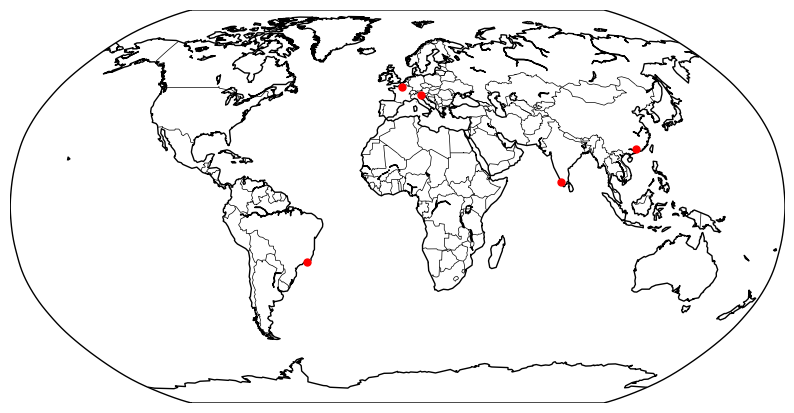

In [16]:
def geolocalizador(aeropuertos:list):
  """
  Grafica los aeropuertos en un mapa.

  Args:
    aeropuertos: Lista de códigos de aeropuertos.
  """
  plt.figure(figsize=(10,10))
  mapa=Basemap(projection='robin',lon_0=0,lat_0=0)
  mapa.drawcoastlines()
  mapa.drawcountries()
  for i in aeropuertos:
    tupla=lat_lon(i)
    x,y=mapa(tupla[1],tupla[0])
    mapa.plot(x,y,color="red",marker="o",markersize=5)
    #plt.text(x, y, i, fontsize=9, color='black')
  #plt.show()
  # tupla1=lat_lon(aeropuertos[0])
  # tupla2=lat_lon(aeropuertos[1])
  # lon1=tupla1[1]
  # lat1=tupla1[0]
  # lon2=tupla2[1]
  # lat2=tupla2[0]
  # mapa.drawgreatcircle(lon1, lat1, lon2, lat2, linewidth=1, color='blue')
vert=["COK","GIG","TSF","CDG","CAN"]
geolocalizador(vert)

Mapa con todos los aeropuertos del dataset

3256


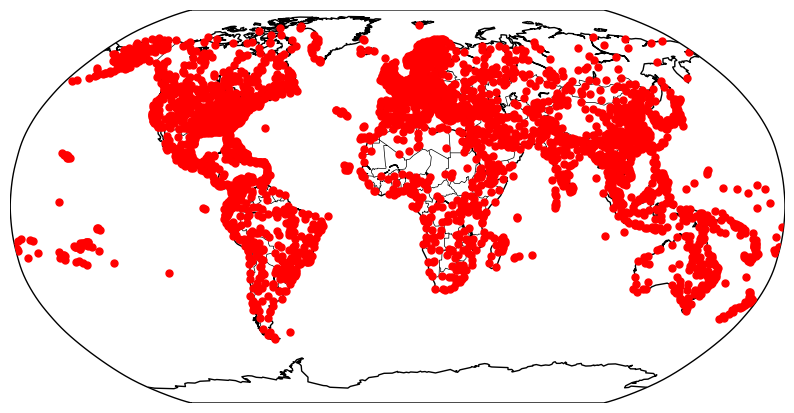

In [17]:
vert=[]
for i in range(66930):
  if(dataf["Source Airport Code"][i] not in vert):
    vert.append(dataf["Source Airport Code"][i])
  if(dataf["Destination Airport Code"][i] not in vert):
    vert.append(dataf["Destination Airport Code"][i])

print(len(vert))
geolocalizador(vert)

In [18]:
class Graph:
    """
    Clase para representar un grafo no dirigido.
    """
    def __init__(self,codigos:list):
        self.L: dict[str, dict[str, float]] = {str(i): {} for i in codigos}

    def add_edge(self, u: str, v: str,vuelos:dict) -> bool:
        """
        Agrega una arista al grafo.

        Args:
            u: Vertice inicial.
            v: Vertice final
            vuelos: diccionario con los vuelos

        Returns:
            True si la arista se agregó correctamente, False en caso contrario.
        """
        if u in self.L and v in self.L:
            if v in self.L[u] or u in self.L[v]:  # Si la arista ya existe
                return False
            if (u, v) in vuelos:  # Buscar en el diccionario de vuelos
                self.L[u][v] = vuelos[(u, v)]
                self.L[v][u] = vuelos[(u, v)]
                return True
            if (v,u) in vuelos:
                self.L[u][v] = vuelos[(u, v)]
                self.L[v][u] = vuelos[(u, v)]

        return False


    def DFS_n(self, u: int) -> None:
        """
        LLama a la funcion que realiza recursivamente un recorrido DFS en el grafo.

        Args:
            u: Vertice inicial.
        """
        visit = {}
        self.__DFS_visit_n(u, visit)

    def __DFS_visit_n(self, u: str, visit: dict) -> dict:
        """
        Realiza un recorrido DFS en el grafo.

        Args:
            u: Vertice inicial.
            visit: Diccionario que contiene los vertices visitados.

        Returns:
            visit: Diccionario que contiene los vertices visitados.
        """
        visit[u] = True
        for v in self.L[u]:
            if not visit.get(v, False):
                visit = self.__DFS_visit_n(v, visit)
        return visit


    def number_of_components(self) -> int:
      """
      Determina el número de componentes conexas en el grafo.

      Returns:
          int: El número de componentes conexas.
      """
      visit = {}
      count = 0
      for u in self.L:
        if not visit.get(u, False):
          self.__DFS_visit_n(u, visit)
          count += 1
          print(len(self.__DFS_visit_n(u, {})))
      return count

    def is_connected(self) -> bool:
        """
        Determina si el grafo es conexo.

        Returns:
            bool: True si el grafo es conexo, False en caso contrario.
        """
        com=self.number_of_components()
        if com==1:
          return True
        else:
          return False

    def find_shortest_path(self, source_airport, destination_airport):
        """
        Encuentra el camino mínimo entre dos aeropuertos utilizando el algoritmo de Dijkstra.

        Args:
            source_airport: Código del aeropuerto de origen.
            destination_airport: Código del aeropuerto de destino.

        Returns:
            list: Una lista de códigos de aeropuertos que representan el camino mínimo,
                 o None si no existe un camino.
        """

        # Calcular las distancias mínimas desde el aeropuerto de origen
        distances = self.dijkstra(source_airport)

        #Se crea el mapa para dibujar el camino minimo
        plt.figure(figsize=(10,10))
        mapa=Basemap(projection='robin',lon_0=0,lat_0=0)
        mapa.drawcoastlines()
        mapa.drawcountries()

        # Si no existe un camino al destino, retornar None
        if distances[destination_airport] == float('inf'):
            return None

        # Reconstruir el camino
        path = [destination_airport]
        current_airport = destination_airport
        dis=0
        while current_airport != source_airport:
            for neighbor, weight in self.L[current_airport].items():
                if distances[neighbor] + weight == distances[current_airport]:
                    path.insert(0, neighbor)
                    #Se dibujan las conexiones en el mapa
                    tupla1=lat_lon(current_airport)
                    tupla2=lat_lon(neighbor)
                    lon1=tupla1[1]
                    lat1=tupla1[0]
                    lon2=tupla2[1]
                    lat2=tupla2[0]
                    mapa.drawgreatcircle(lon1, lat1, lon2, lat2, linewidth=1, color='blue')
                    #Se actualiza el aeropuerto actual y la distancia total
                    current_airport = neighbor
                    dis+=weight
                    break
        #Se marcan los aeropuertos en el mapa
        for i in path:
          tupla=lat_lon(i)
          x,y=mapa(tupla[1],tupla[0])
          mapa.plot(x,y,color="red",marker="o",markersize=5)
        return path,dis







    def dijkstra(self, source_airport):
      """
      Encuentra las distancias mínimas desde un aeropuerto de origen utilizando el algoritmo de Dijkstra.

      Args:
          source_airport: Código del aeropuerto de origen.
      Returns:
          dict: Un diccionario que contiene los códigos de los aeropuertos como claves y
                las distancias mínimas desde el aeropuerto de origen como valores.
      """
      distances = {airport: float('inf') for airport in self.L}
      distances[source_airport] = 0
      unvisited = set(self.L.keys())

      while unvisited:
          current_airport = min(unvisited, key=lambda x: distances[x])

          # Iterate through neighbors and use pre-calculated distances
          for neighbor, weight in self.L[current_airport].items():
              distancia = distances[current_airport] + weight
              if distancia < distances[neighbor]:
                  distances[neighbor] = distancia

          unvisited.remove(current_airport)

      return distances



    def find_longest_paths(self, start_code):
        """
        Encuentra los 10 caminos más largos desde un aeropuerto de origen.

        Args:
            start_code: Código del aeropuerto de origen.

            Returns:
            list: Una lista de tuplas que contienen el código del aeropuerto y la distancia del camino.
        """
        if start_code not in self.L:
          print("El aeropuerto de partida no existe en el grafo.")
          return
        # Obtener información del aeropuerto de partida
        print(self.get_airport_info_from_graph(start_code))
        # Primero ejecutamos Dijkstra para obtener los caminos mínimos
        shortest_distances = self.dijkstra(start_code)

        # Ahora encontramos los 10 caminos más largos
        longest_paths = sorted([(airport, distance) for airport, distance in shortest_distances.items() if distance != float('inf')], key=lambda x: x[1], reverse=True)[:10]
        return longest_paths



    def get_airport_info_from_graph(self,code: str) -> Dict[str, str]:
      """
      Obtiene la información del aeropuerto a partir de su código.

      Args:
          code: Código del aeropuerto.

      Returns:
          dict: Un diccionario que contiene la información del aeropuerto.
      """
      # Buscar el código del aeropuerto en los vértices del grafo
      if code not in self.L.keys():
          print(f"Aeropuerto '{code}' no encontrado en el grafo.")
          return
      # Obtener la información del aeropuerto desde el DataFrame original
      airport_data = dataf[dataf['Source Airport Code'] == code].iloc[0]

      return {
          'Code': airport_data['Source Airport Code'],
          'Name': airport_data['Source Airport Name'],
          'City': airport_data['Source Airport City'],
          'Country': airport_data['Source Airport Country'],
          'Latitude': float(airport_data['Source Airport Latitude']),
          'Longitude': float(airport_data['Source Airport Longitude'])
      }



    def kruskal_mst_sum(self):
        """
        Encuentra el árbol de expansión mínima utilizando el algoritmo de Kruskal.

        Returns:
            dict: Un diccionario que contiene la suma de los pesos para cada componente conectada.
        """
        edges = []
        for u in self.L:
            for v in self.L[u]:
                if (v, u) not in edges:  # Evitar duplicar aristas
                    edges.append((u, v, self.L[u][v]))

        edges.sort(key=lambda x: x[2])  # Ordenar aristas por peso
        parent = {node: node for node in self.L}
        rank = {node: 0 for node in self.L}

        def find(node):
            if parent[node] != node:
                parent[node] = find(parent[node])
            return parent[node]

        def union(node1, node2):
            root1 = find(node1)
            root2 = find(node2)
            if root1 != root2:
                if rank[root1] > rank[root2]:
                    parent[root2] = root1
                elif rank[root1] < rank[root2]:
                    parent[root1] = root2
                else:
                    parent[root2] = root1
                    rank[root1] += 1

        mst_weight_sum = 0
        mst_components = []
        for u, v, weight in edges:
            if find(u) != find(v):
                union(u, v)
                mst_weight_sum += weight
                mst_components.append((u, v, weight))

        # Calcular la suma de los pesos para cada componente conectada
        components = {}
        for u, v, weight in mst_components:
            root = find(u)
            if root not in components:
                components[root] = {'weight_sum': 0, 'vertices': set()}
            components[root]['weight_sum'] += weight
            components[root]['vertices'].update([u, v])

        return components

    def get_mst_components(self):
        """
        Obtiene la información del árbol de expansión mínima.

        Returns:
            dict: Un diccionario que contiene la información del árbol de expansión mínima.
        """
        mst_data = self.kruskal_mst_sum()
        mst_info = {}
        for root, data in mst_data.items():
            if isinstance(data, dict):
                mst_info[root] = {
                    'weight_sum': data['weight_sum'],
                    'vertices': list(data['vertices'])
                }
        return mst_info


In [19]:
for i in range(15):
  print(dataf["Source Airport Code"][i])

print("\n")
for i in range(15):
  print(dataf["Destination Airport Code"][i])

COK
GIG
TSF
CDG
CGH
DFW
DOM
ATL
FUE
BRS
MNL
MED
DUS
CGH
SZX


SHJ
BSB
BRI
FLR
CGB
YUL
PTP
FCO
BCN
CHQ
FUK
DOH
CTA
IOS
CZX


In [20]:
#Todos los aeropuertos del grafo
vert=[]
for i in range(len(dataf)):
  if(dataf["Source Airport Code"][i] not in vert):
    vert.append(dataf["Source Airport Code"][i])
  if(dataf["Destination Airport Code"][i] not in vert):
    vert.append(dataf["Destination Airport Code"][i])


#diccionario con los vuelos
vuelos = {}
for i in range(len(dataf)):
    origen = dataf["Source Airport Code"][i]
    destino = dataf["Destination Airport Code"][i]
    peso = distance(dataf["Source Airport Latitude"][i], dataf["Source Airport Longitude"][i], dataf["Destination Airport Latitude"][i], dataf["Destination Airport Longitude"][i])
    vuelos[(origen, destino)] = peso

print(len(vert))
G=Graph(vert)
#Como añadir una arista
for i in range(len(dataf)):
 G.add_edge(dataf["Source Airport Code"][i],dataf["Destination Airport Code"][i],vuelos)
 print(i)


Streaming output truncated to the last 5000 lines.
61930
61931
61932
61933
61934
61935
61936
61937
61938
61939
61940
61941
61942
61943
61944
61945
61946
61947
61948
61949
61950
61951
61952
61953
61954
61955
61956
61957
61958
61959
61960
61961
61962
61963
61964
61965
61966
61967
61968
61969
61970
61971
61972
61973
61974
61975
61976
61977
61978
61979
61980
61981
61982
61983
61984
61985
61986
61987
61988
61989
61990
61991
61992
61993
61994
61995
61996
61997
61998
61999
62000
62001
62002
62003
62004
62005
62006
62007
62008
62009
62010
62011
62012
62013
62014
62015
62016
62017
62018
62019
62020
62021
62022
62023
62024
62025
62026
62027
62028
62029
62030
62031
62032
62033
62034
62035
62036
62037
62038
62039
62040
62041
62042
62043
62044
62045
62046
62047
62048
62049
62050
62051
62052
62053
62054
62055
62056
62057
62058
62059
62060
62061
62062
62063
62064
62065
62066
62067
62068
62069
62070
62071
62072
62073
62074
62075
62076
62077
62078
62079
62080
62081
62082
62083
62084
62085
62086
62087
6

1. Determinar si el grafo generado es conexo. En caso de no serlo determinar el
numero de componentes y la cantidad de vértices de cada una de ellas.

In [23]:
#G.is_connected()
G.number_of_components()

3230
4
4
10
4
2
2


7

2. Determinar el peso del árbol de expansión mínima. En caso de haber más de
una componente determinar el peso del árbol de expansión mínima de cada
una de las componentes.

In [25]:
print(G.get_mst_components())

{'BOS': {'weight_sum': 1197586.1271282653, 'vertices': ['WMN', 'IRK', 'AMD', 'IQT', 'CKB', 'KIM', 'MOT', 'EAE', 'HET', 'BEL', 'LNB', 'SIN', 'KZO', 'MOU', 'DEC', 'AGT', 'YYU', 'BSD', 'UIO', 'SDJ', 'BKQ', 'SXO', 'TOE', 'VIG', 'PZB', 'AGP', 'SKO', 'MMK', 'HFS', 'LED', 'THX', 'VRC', 'YNT', 'VBY', 'DTW', 'KRL', 'TOS', 'BTV', 'BWN', 'ALF', 'TYN', 'ANG', 'YAT', 'AUX', 'LGB', 'DUB', 'VIN', 'RGN', 'BAH', 'HAN', 'VAI', 'DMK', 'ISN', 'OLB', 'PNL', 'CTA', 'MQL', 'MXL', 'SKX', 'URA', 'GHA', 'YQQ', 'AAE', 'FNJ', 'LGW', 'SKZ', 'TPS', 'YKU', 'ZHY', 'KFS', 'YHK', 'DSK', 'BAQ', 'FUN', 'YUB', 'YNJ', 'XCH', 'ATY', 'BNI', 'YQL', 'ABX', 'TRN', 'SDG', 'NVK', 'KNS', 'YKF', 'TKP', 'HTY', 'YXU', 'GIS', 'GRP', 'OMA', 'RAE', 'PDG', 'MCX', 'YMN', 'SLM', 'TSR', 'NAQ', 'KOP', 'RGI', 'VKG', 'LBB', 'BEG', 'TRR', 'BJF', 'CAB', 'IPA', 'YYG', 'VDM', 'KDM', 'VKT', 'TUG', 'VHC', 'CPO', 'PYH', 'VVO', 'GPT', 'BBK', 'OUL', 'UTN', 'CGO', 'PMY', 'EUX', 'XGR', 'SHM', 'ASB', 'HHN', 'VVC', 'SSJ', 'VAA', 'DBV', 'ADB', 'TVY', 'ECP',

3. Dado un primer vértice por el código del aeropuerto o seleccionado mediante
la interfaz gráfica:

  a. Mostrar la información correspondiente al aeropuerto (código, nombre,
ciudad, país, latitud y longitud).

  b. Mostrar la información (código, nombre, ciudad, país, latitud y longitud)
de los 10 aeropuertos cuyos caminos mínimos desde el vértice dado sean
los más largos. Adicionalmente, se debe mostrar la distancia de los
caminos.
4. Dado un segundo vértice por el código del aeropuerto o seleccionado
mediante la interfaz gráfica:

  a. Mostrar el camino mínimo entre el primer y el segundo vértice sobre el
mapa de la interfaz gráfica, pasando por cada uno de los vértices
intermedios del camino. Para cada vértice intermedio se debe mostrar la
información del aeropuerto (código, nombre, ciudad, país, latitud y
longitud).


Ingrese el código del aeropuerto de partida: SDQ
{'Code': 'SDQ', 'Name': 'Las Américas International Airport', 'City': 'Santo Domingo', 'Country': 'Dominican Republic', 'Latitude': 18.42970085, 'Longitude': -69.66889954}

Los 10 caminos más largos desde SDQ son:
1. CCK: 23737.359861241774
{'Code': 'CCK', 'Name': 'Cocos (Keeling) Islands Airport', 'City': 'Cocos Keeling Island', 'Country': 'Cocos (Keeling) Islands', 'Latitude': -12.18830013, 'Longitude': 96.83390045}

2. XCH: 22752.694139118914
{'Code': 'XCH', 'Name': 'Christmas Island Airport', 'City': 'Christmas Island', 'Country': 'Christmas Island', 'Latitude': -10.45059967, 'Longitude': 105.6900024}

3. DCN: 21921.652868682086
{'Code': 'DCN', 'Name': 'RAAF Base Curtin', 'City': 'Derby', 'Country': 'Australia', 'Latitude': -17.58139992, 'Longitude': 123.8280029}

4. MKQ: 21588.721868129596
{'Code': 'MKQ', 'Name': 'Mopah Airport', 'City': 'Merauke', 'Country': 'Indonesia', 'Latitude': -8.520290375, 'Longitude': 140.4179993}

5. LEA: 

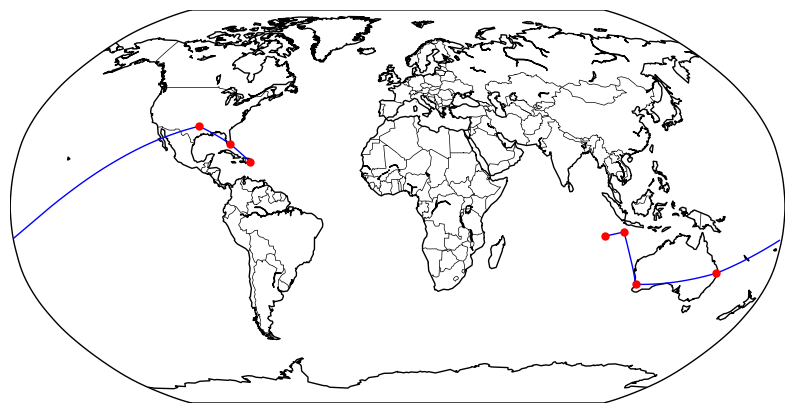

In [26]:
start_code = input("Ingrese el código del aeropuerto de partida: ")

if start_code not in G.L:
    print("El aeropuerto de partida no existe en el grafo.")
else:
    # Obtener los 10 caminos más largos desde el punto de partida especificado
    longest_paths =  G.find_longest_paths(start_code)

    # Mostrar los resultados
    print(f"\nLos 10 caminos más largos desde {start_code} son:")
    for i, (airport, distance) in enumerate(longest_paths, 1):
        print(f"{i}. {airport}: {distance}")
        print(G.get_airport_info_from_graph(airport))
        print()
    destination_code=input("Ingrese el código del aeropuerto de destino: ")
    shortest_path,dis = G.find_shortest_path(start_code, destination_code)
    if shortest_path:
        print("El camino más corto es:", shortest_path)
        #print("Distancia total:", sum(G.L[shortest_path[i]][shortest_path[i + 1]] for i in range(len(shortest_path) - 1)))
        for i in range(len(shortest_path)):
          print(G.get_airport_info_from_graph(shortest_path[i]))
        print("Distancia total:",dis)
    else:
        print("No existe un camino entre los aeropuertos.")

